<a href="https://colab.research.google.com/github/JinbiaoJi/MLTSA_JJi/blob/master/HW2/JJi_HW2_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

# data ingestion

read in the first 10 files, in alphabetical order, in the https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs Stock dataset. Follow [this notebook](https://github.com/fedhere/MLTSA_FBianco/blob/master/CodeExamples/Kaggledata_load.ipynb) for guidance on how to programmatically access the Kaggle data. The data must be accessed from a google colab notebook programmatically using the Kaggle API and software. 
Note: to sort file alphabecially you can use the glob package and the sort function of numpy:

The files need to be in a single dataframe with "Date" as index. 

Read in each file (e.g. with ```pd.read_csv()``` into a dataframe. Merge each df recursively with the precious one using the ```merge()``` method of dataframes, mergin on "Date". Use only the "Close" column (the price at closing). Rename  each column by the name of the file (e.g. the "Close" column of the "a.us.txt" file should be named "a.us"


There is a partial solution available in the slides (very last slide in [MLTSA2](https://slides.com/federicabianco/mltsa2/live?context=editing#/14/1))



In [4]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
cd gdrive/My\ Drive/

/content/gdrive/My Drive


In [0]:
!chmod 600 kaggle.json

In [0]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [8]:
cd HugeStock/data/

/content/gdrive/My Drive/HugeStock/data


In [9]:
ls

Data/  ETFs/  price-volume-data-for-all-us-stocks-etfs.zip  Stocks/


In [0]:
import glob

In [11]:
cd Stocks/

/content/gdrive/My Drive/HugeStock/data/Stocks


In [12]:
filenames = np.sort(glob.glob('*.txt'))
print('There are {} files.'.format(len(filenames)))

There are 7195 files.


In [0]:
allfiles = filenames[:10]

In [14]:
tss = pd.read_csv(allfiles[0])[["Date", "Close"]].rename(columns={"Close": allfiles[0][0:-4]})

for f in allfiles[1:]:
  tss = tss.merge(pd.read_csv(f)[["Date", "Close"]].rename(columns = {"Close":f[:-4]}), on="Date")

tss.set_index("Date", inplace = True)

print ("shape of the dataset:", tss.shape)

shape of the dataset: (447, 10)


#  data inspection

plot each time series (ts)

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


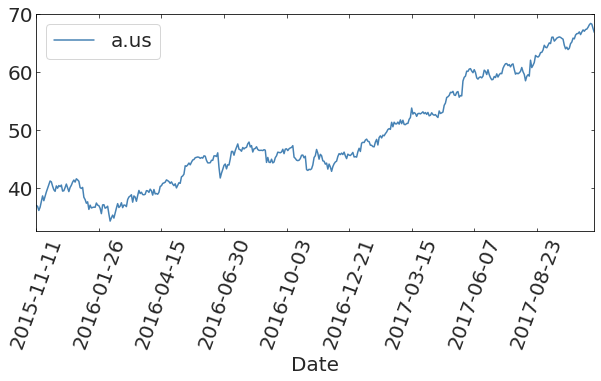

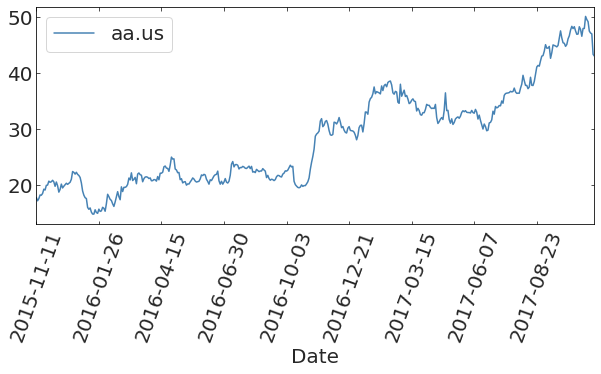

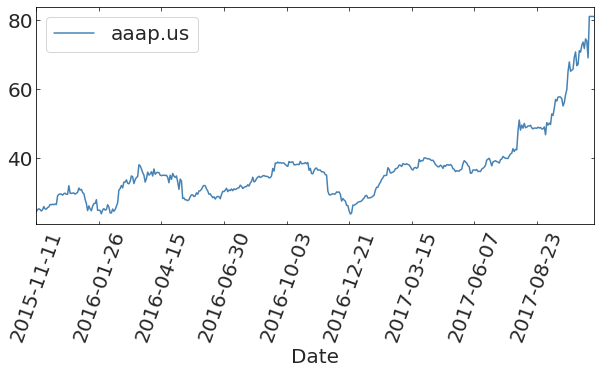

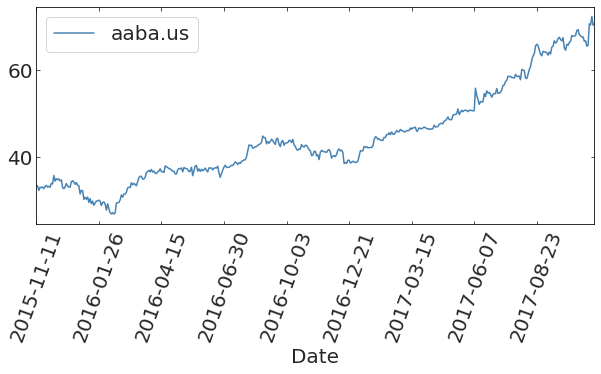

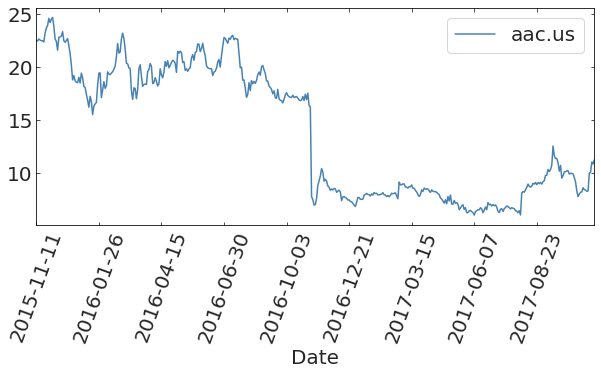

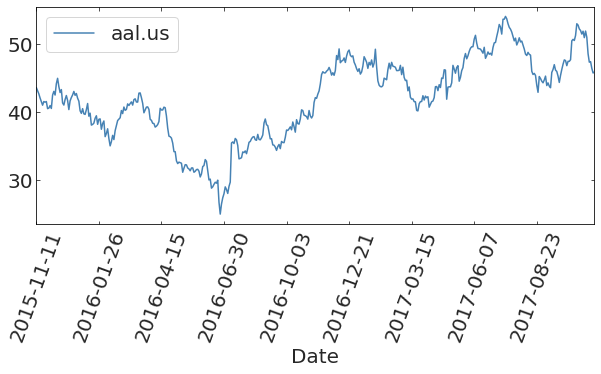

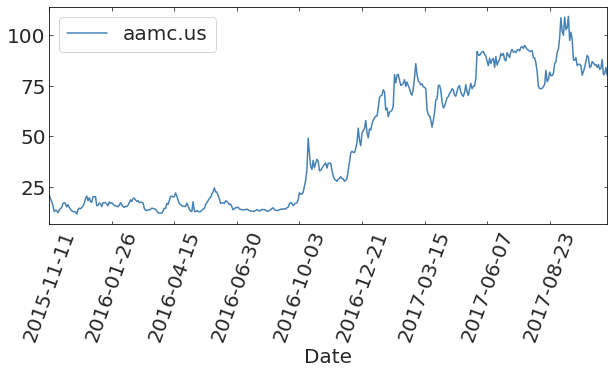

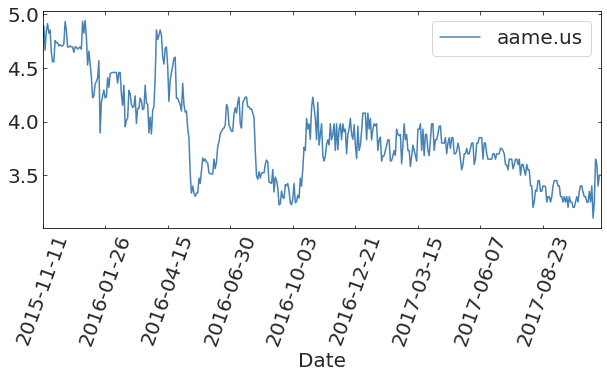

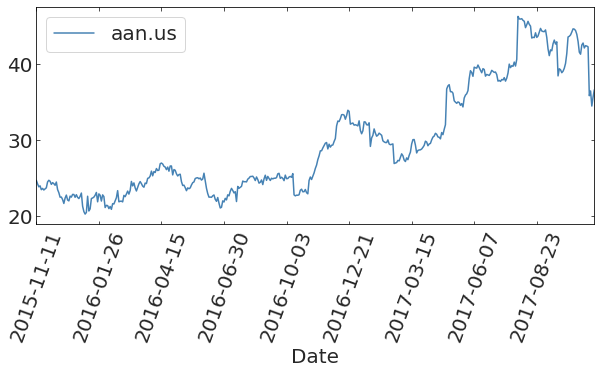

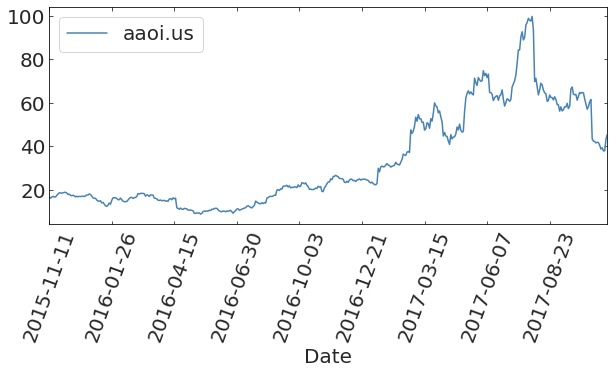

In [15]:
for c in tss.columns:
  fig, ax = pl.subplots(figsize=(10,4))
  tss.plot(y = c, ax = ax, rot = 70)

**==>A caption should start with Fig X: not an interpretation**

<font color='red'>Interpretation:</font>

The closing price of the first 10 stocks from 2015 to 2017. The data are from Huge Stock Market Dataset. 

## visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


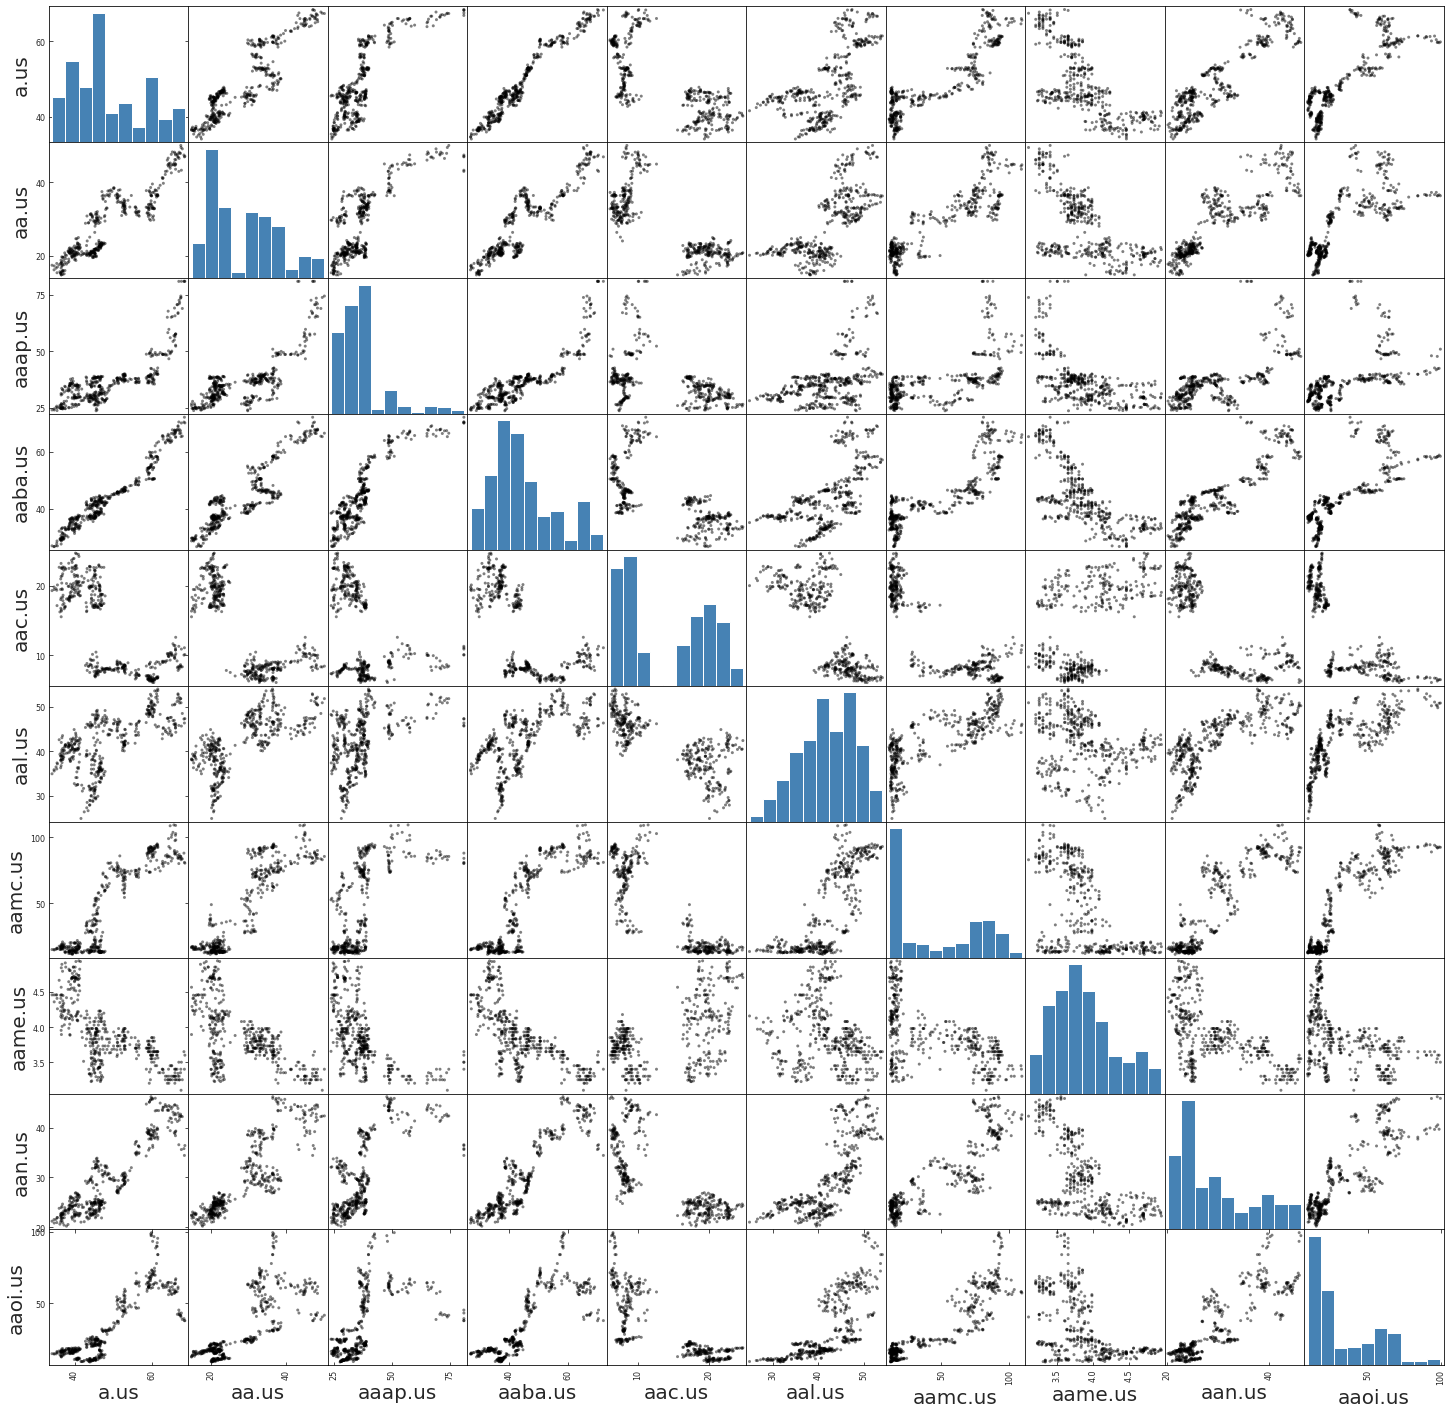

In [16]:
from pandas.plotting import scatter_matrix

scatter_matrix(tss,figsize=(25,25) , c = 'k');

<font color='red'>Interpretation:</font>

The scatter matrix of the closing price of each stock. It shows the relationship of each stock.

In [17]:
tss.corr()

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
a.us,1.000000,0.902139,0.800310,0.973457,-0.721867,0.621041,0.897263,-0.699609,0.905395,0.851239
aa.us,0.902139,1.000000,0.776600,0.904210,-0.791137,0.713229,0.893952,-0.606774,0.873520,0.766459
aaap.us,0.800310,0.776600,1.000000,0.872134,-0.423021,0.451520,0.621329,-0.573976,0.696179,0.560427
aaba.us,0.973457,0.904210,0.872134,1.000000,-0.670578,0.612989,0.849972,-0.709023,0.903785,0.809059
aac.us,-0.721867,-0.791137,-0.423021,-0.670578,1.000000,-0.785248,-0.868936,0.510986,-0.765267,-0.780147
aal.us,0.621041,0.713229,0.451520,0.612989,-0.785248,1.000000,0.780517,-0.219258,0.756808,0.746505
aamc.us,0.897263,0.893952,0.621329,0.849972,-0.868936,0.780517,1.000000,-0.544740,0.881631,0.904166
aame.us,-0.699609,-0.606774,-0.573976,-0.709023,0.510986,-0.219258,-0.544740,1.000000,-0.585002,-0.496371
aan.us,0.905395,0.873520,0.696179,0.903785,-0.765267,0.756808,0.881631,-0.585002,1.000000,0.860847
aaoi.us,0.851239,0.766459,0.560427,0.809059,-0.780147,0.746505,0.904166,-0.496371,0.860847,1.000000


findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


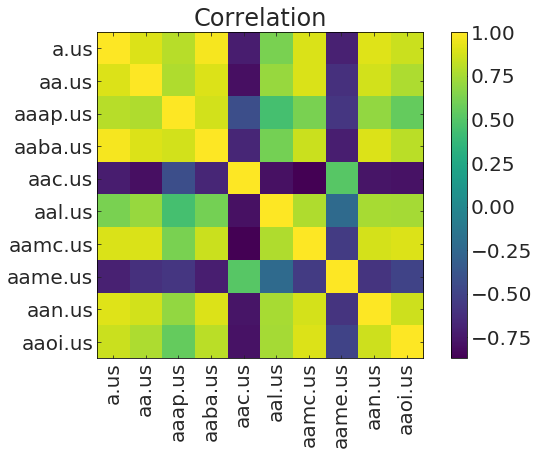

In [18]:
pl.imshow(tss.corr());
pl.colorbar();
pl.title('Correlation');
pl.yticks(range(len(tss.columns)), tss.columns, fontsize = 20);
pl.xticks(range(len(tss.columns)), tss.columns, fontsize = 20, rotation = 90);

<font color='red'>Interpretation:</font>

The pairwis correlation as a heatmap for each stock. Different colors represent different correlation value.

## testing for stationarity
test if each of these time series is stationary using the AD fuller test using ```statsmodels.api.tsa.stattools.adfuller()```

```for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

In [0]:
import statsmodels.api as sm

In [20]:
threshold = 0.05
for c in tss.columns:
    print(c, "is stationary:", sm.tsa.stattools.adfuller(tss[c])[1] < threshold)

a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False


## measure autocorrelation

plot the time series and its autocorrelation and partial autocorrelation function in blue if it is not stationary, in red if it is stationary

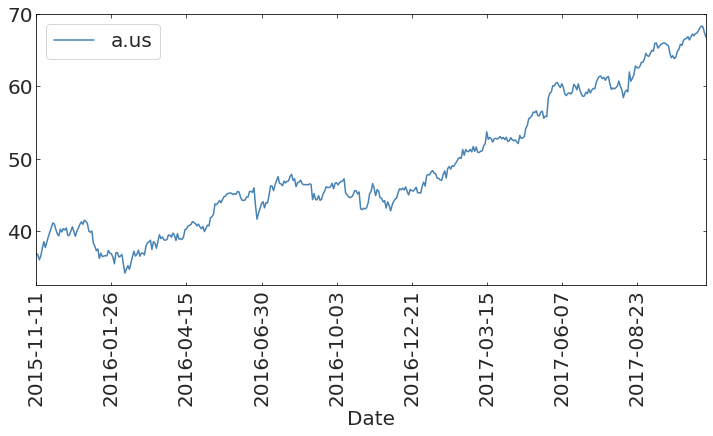

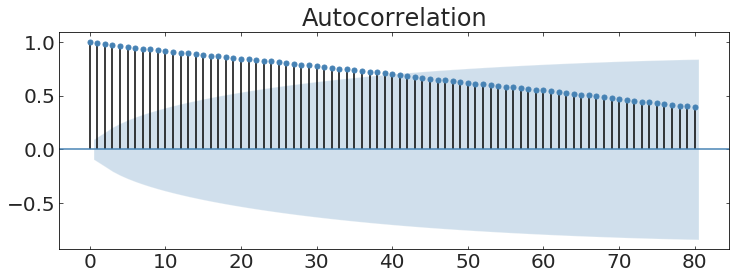

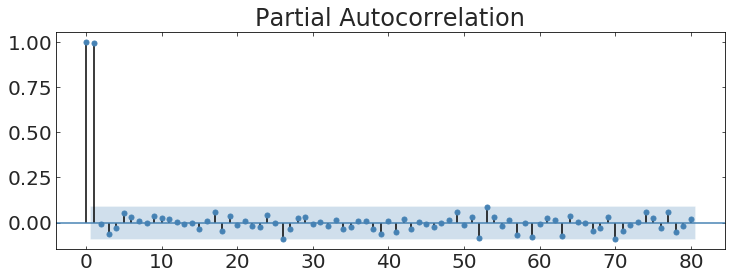

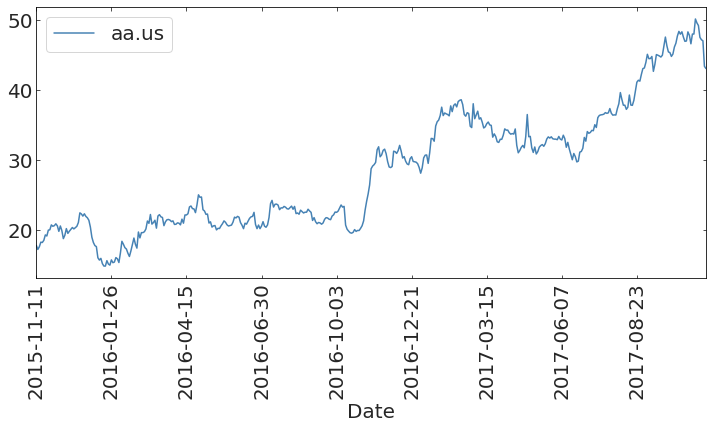

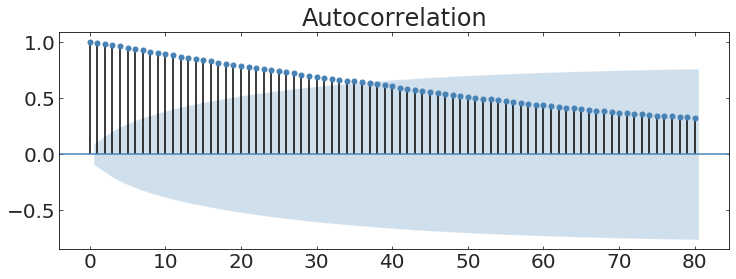

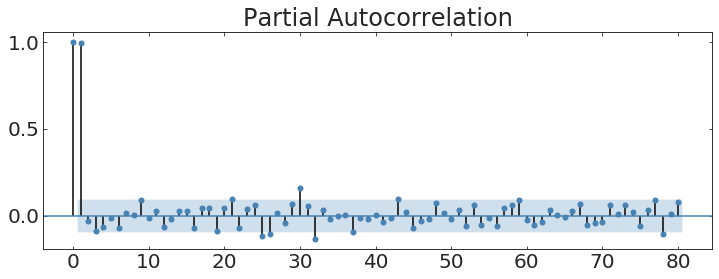

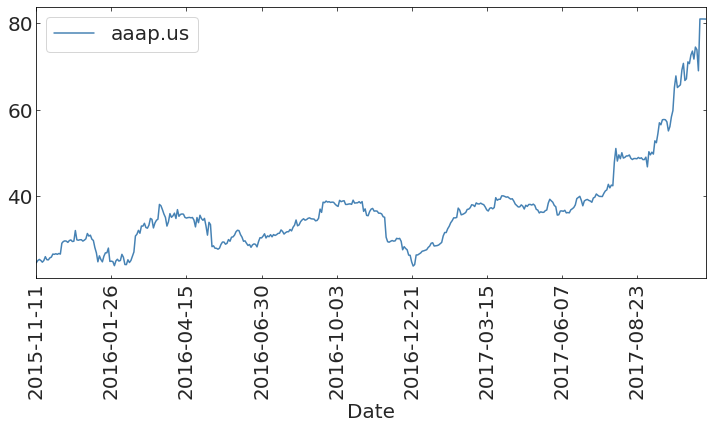

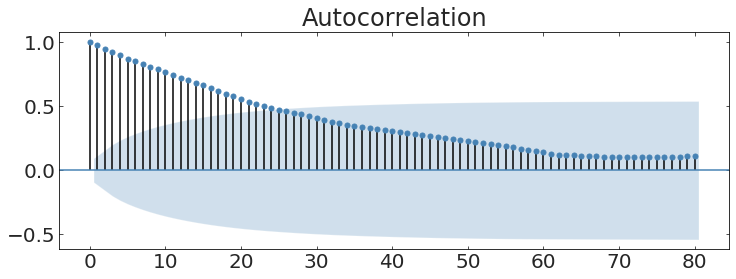

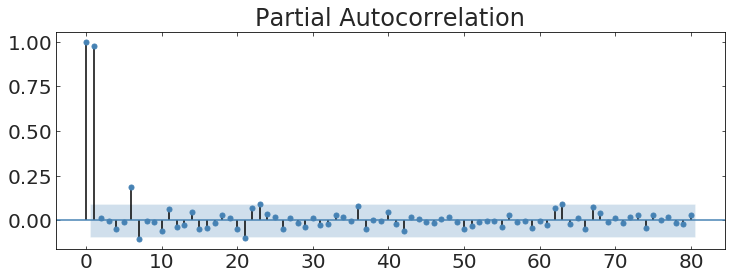

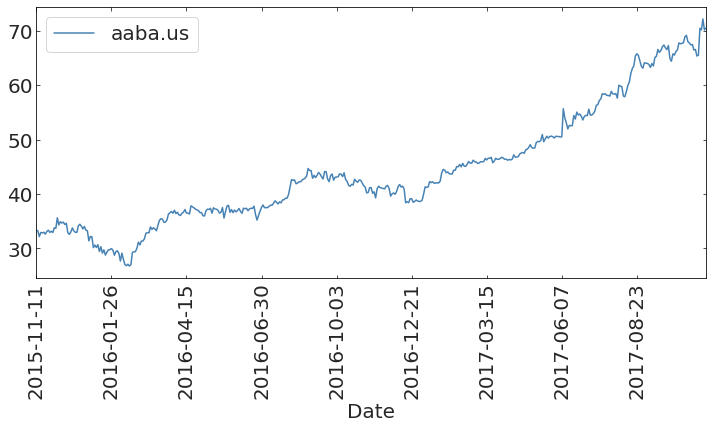

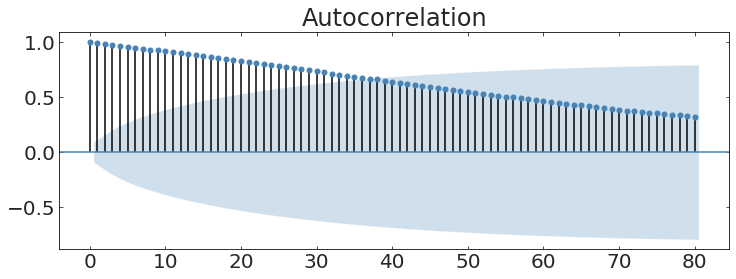

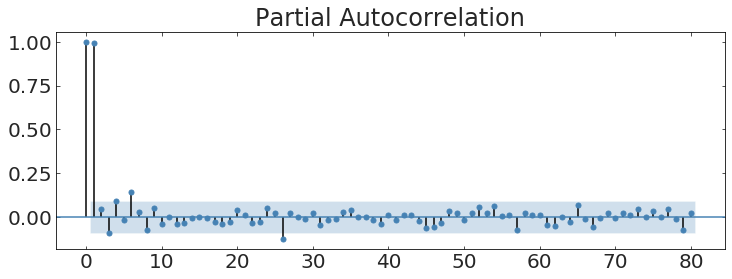

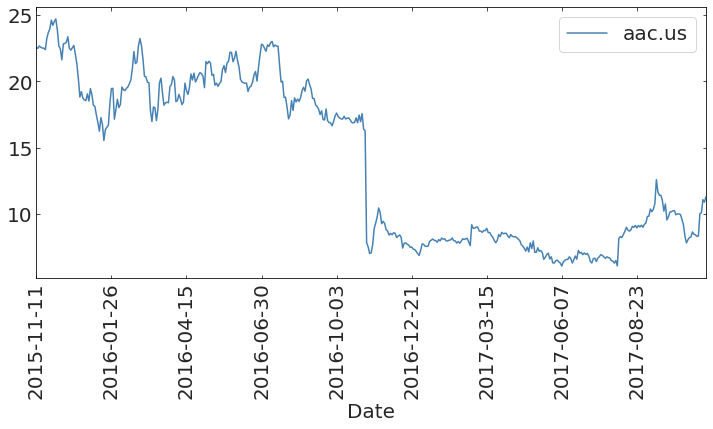

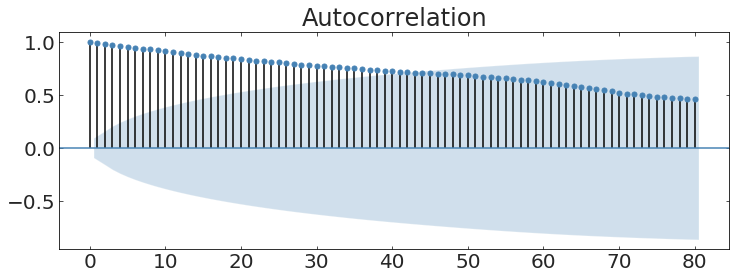

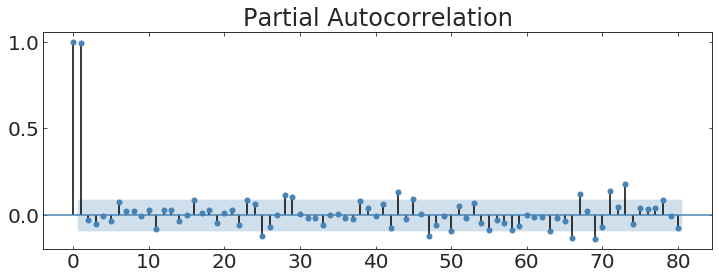

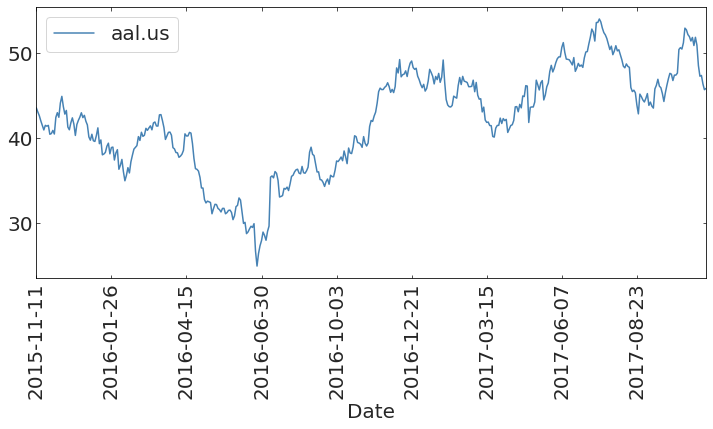

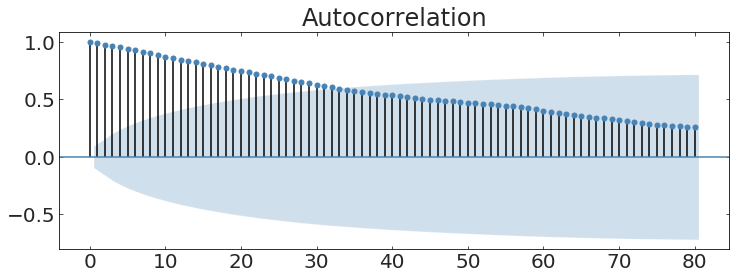

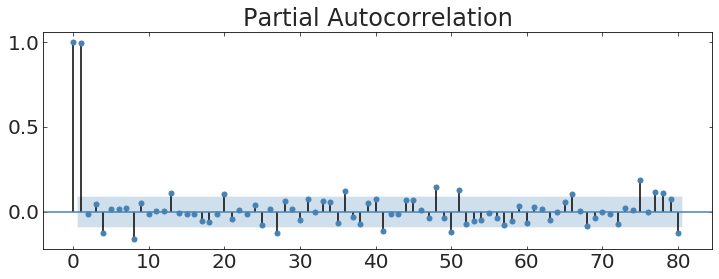

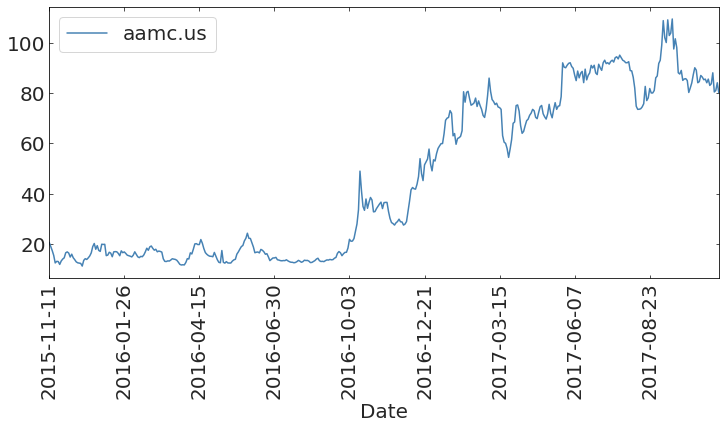

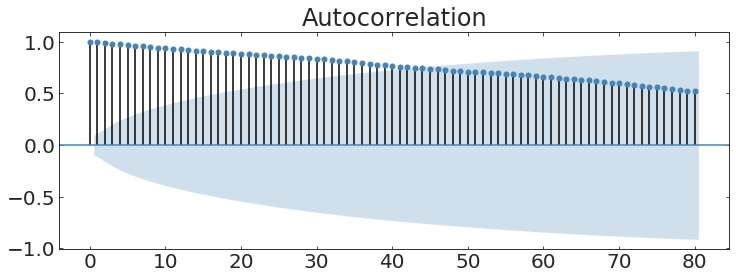

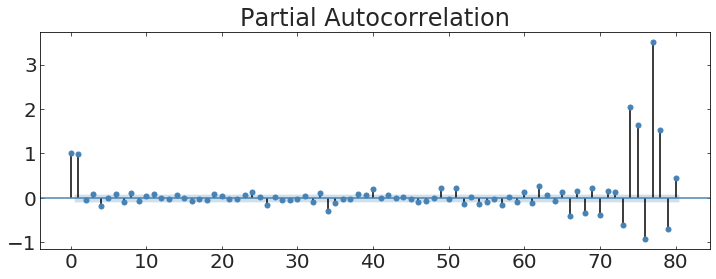

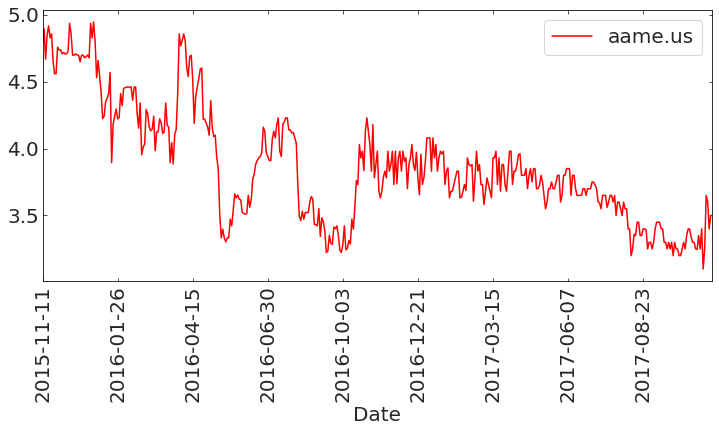

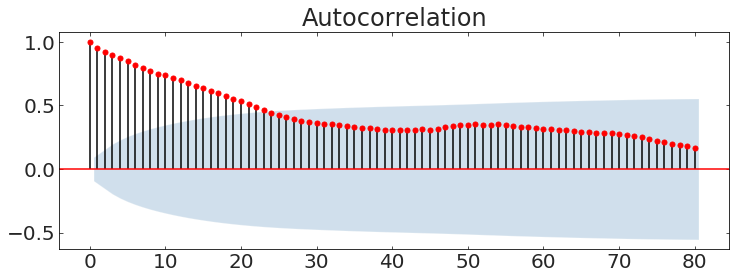

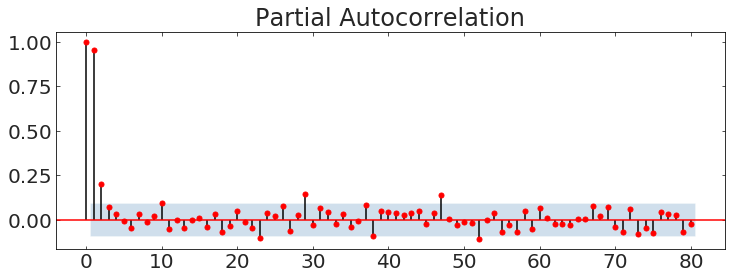

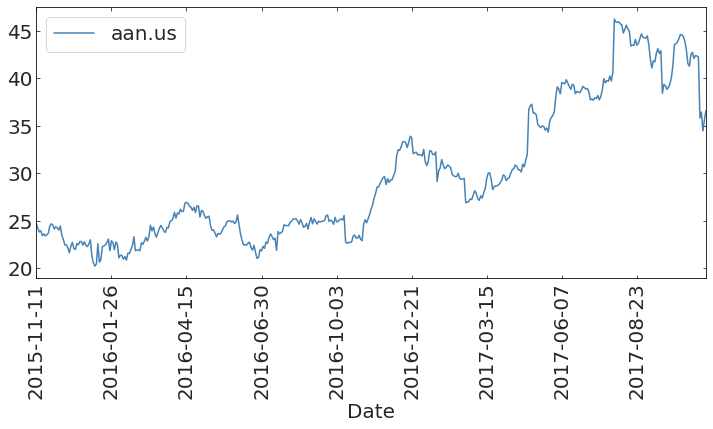

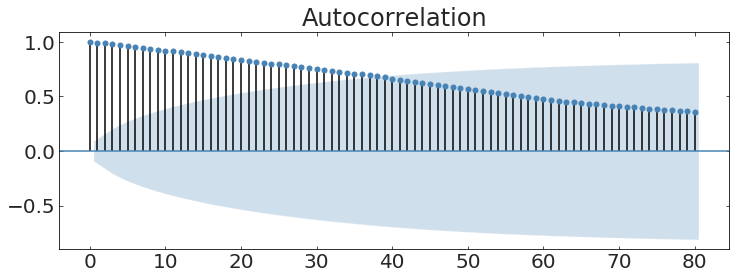

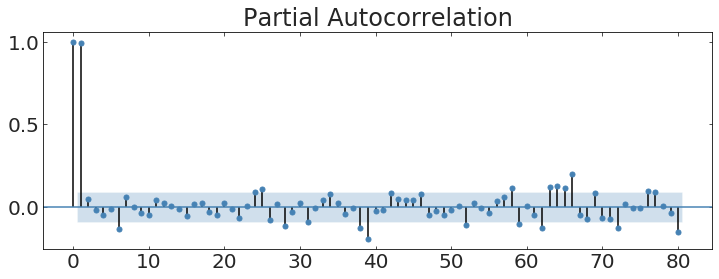

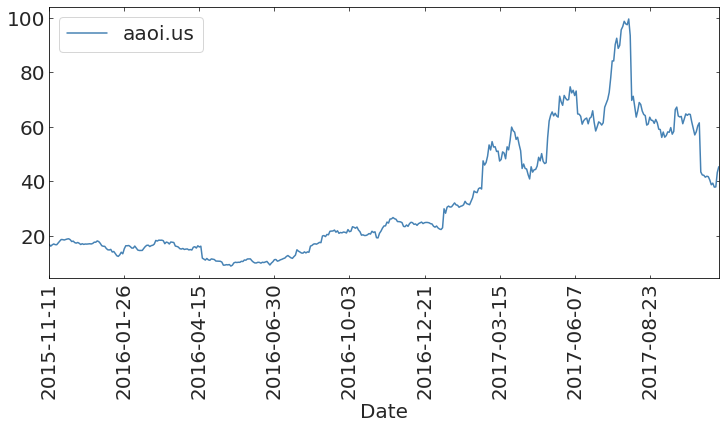

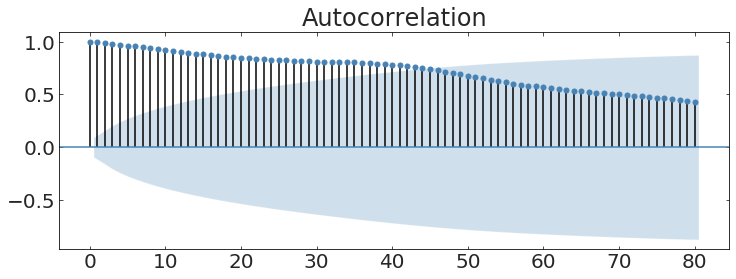

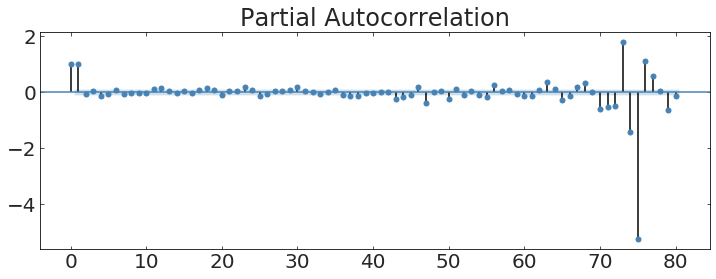

In [21]:
import warnings
warnings.filterwarnings("ignore")

for c in tss.columns:
  if( sm.tsa.stattools.adfuller(tss[c])[1]< threshold) :
        color='r'
  else:
        color='C0'

  fig, ax = pl.subplots(figsize=(12,5));
  tss.plot(y=c,rot = 90, label =c, ax = ax, color = color);

  fig, ax = pl.subplots(figsize=(12,4));
  sm.graphics.tsa.plot_acf(tss[c], lags =80, ax =ax, color = color);

  fig, ax = pl.subplots(figsize=(12,4));
  sm.graphics.tsa.plot_pacf(tss[c], lags =80,ax = ax, color = color);

**==> Always remember: no caption no score!**

# Fit one of the stationary time series with ARMA

To fit the model to the data use ```statsmodels.api.tsa.ARMA```

Inspect the function call as ```statsmodels.api.tsa.ARMA?```

The statsmodels models are generally fit into 2 phases: generating the model ```sm.tsa.ARMA(data, parameters)```, and then fitting it ```sm.tsa.ARMA(data, parameters).fit()```. 

For at least one model look at the model summary ```mod.summary()``` What are the best fit parameters based on this printed summary and thewir uncertainties? What is the value of the AIC(Aikiki Information Criterion)

See https://github.com/fedhere/A-Data-Driven-Evaluation-of-Delays-in-Criminal-Prosecution/blob/master/CodeExamples/ARMA/testingARMA_ARIMA.ipynb

## 1 Fit the model for a variety of parameters. You can run a nested loop to iterate over a range of p and q parameters
## 2. record the aic score for each fit
## 3. Find the best parameters to fit this time series with the AIC minimization criterion. For each model, after you fit it to the data, you can get the value of the AIC as ```model.aic```

In [0]:
aics_st = np.zeros((5,5))
for p in range(5):
  for q in range(5):
    try:
      mod = sm.tsa.ARMA(tss[['aame.us']], (p,q)).fit()
      aics_st[p][q] = mod.aic
    except:
      pass

In [53]:
min_p = np.where(aics_st == np.nanmin(aics_st))[0][0]
min_q = np.where(aics_st == np.nanmin(aics_st))[1][0]
print("best parameters: p = {}, q = {}. ".format(min_p, min_q) )

best parameters: p = 1, q = 1. 


In [54]:
min_mod = sm.tsa.ARMA(tss[['aame.us']], (min_p,min_q)).fit()
min_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                aame.us   No. Observations:                  447
Model:                     ARMA(1, 1)   Log Likelihood                 301.057
Method:                       css-mle   S.D. of innovations              0.123
Date:                Thu, 27 Feb 2020   AIC                           -594.115
Time:                        02:27:56   BIC                           -577.705
Sample:                             0   HQIC                          -587.645
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9275      0.204     19.247      0.000       3.528       4.327
ar.L1.aame.us     0.9811      0.010    100.057      0.000       0.962       1.000
ma.L1.aame.us    -0.2706      0.049     -5.576      0.000      -0.366      -0.175
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0192           +0.0000j            1.0192            0.0000
MA.1            3.6958           +0.0000j            3.6958            0.0000
-----------------------------------------------------------------------------
"""

## 4. predict the in-set and the future alues

you can use ```mod.plot_predict()``` to visualize them

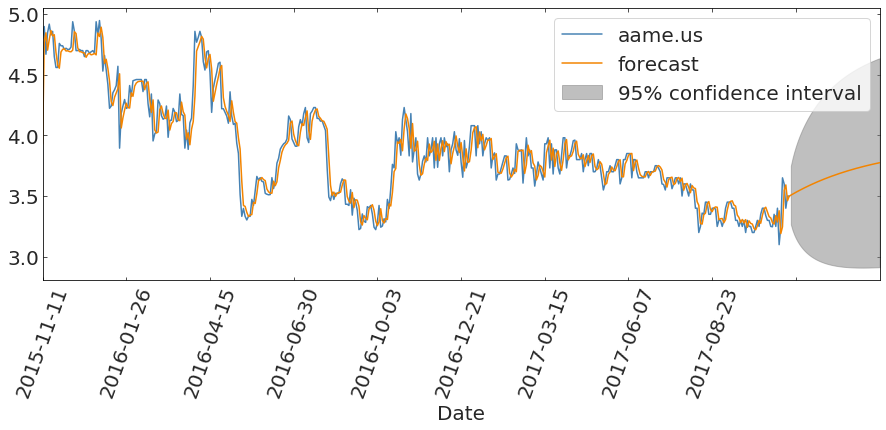

In [90]:
ax = tss[['aame.us']].plot(figsize=(15,5))
min_mod.plot_predict(end=500, plot_insample=False, ax=ax);
ax.tick_params(which='major', axis='x', rotation = 70);
ax.legend(fontsize = 20);

<font color='red'>Interpretation:</font>

The 'aame.us' closing price time series and the forcast of a autoregressive model.

# 3.5 what are the coefficients of the best fit model? what do they mean? 


In [78]:
print("The coefficients of the best fit model are:")
min_mod.params

The coefficients of the best fit model are:


const            3.927505
ar.L1.aame.us    0.981141
ma.L1.aame.us   -0.270580
dtype: float64

Constant  = 3.9275

Autoregressive term coefficient = 0.9811 

Moving avarage term coefficient = -0.2806

#  choose 2 non stationary time series in the set that are not correlated and repeat steps 3.1-3.4 with the ARIMA model

choose a value of the integration order that is reasonable ...

**==>should choose 2 the least correlated (the minimal abs value) non-stationary TSes, a.us and aac.us has a negative correlation which is over 0.7**

In [0]:
#Choose 1 as integration order.
aics_st = np.zeros((5,5))
for p in range(5):
  for q in range(5):
    try:
      mod = sm.tsa.ARIMA(tss[['a.us']], (p,1,q)).fit()
      aics_st[p][q] = mod.aic
    except:
      aics_st[p][q] = np.nan



In [120]:
min_parameters = np.where(aics_st == np.nanmin(aics_st))
min_p=min_parameters[0][0]
min_q=min_parameters[1][0]
print("best parameters for 'a.us': p = {}, d = {}, q = {}. ".format(min_p, 1, min_q))  

best parameters for 'a.us': p = 2, d = 1, q = 1. 


In [119]:
min_mod = sm.tsa.ARIMA(tss[['a.us']], (min_p,1,min_q)).fit()
min_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.a.us   No. Observations:                  446
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -415.849
Method:                       css-mle   S.D. of innovations              0.615
Date:                Thu, 27 Feb 2020   AIC                            841.697
Time:                        03:48:55   BIC                            862.199
Sample:                             1   HQIC                           849.781
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0674      0.026      2.575      0.010       0.016       0.119
ar.L1.D.a.us    -0.9979      0.094    -10.582      0.000      -1.183      -0.813
ar.L2.D.a.us    -0.1279      0.048     -2.648      0.008      -0.222      -0.033
ma.L1.D.a.us     0.9103      0.085     10.746      0.000       0.744       1.076
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1808           +0.0000j            1.1808            0.5000
AR.2           -6.6239           +0.0000j            6.6239            0.5000
MA.1           -1.0986           +0.0000j            1.0986            0.5000
-----------------------------------------------------------------------------
"""

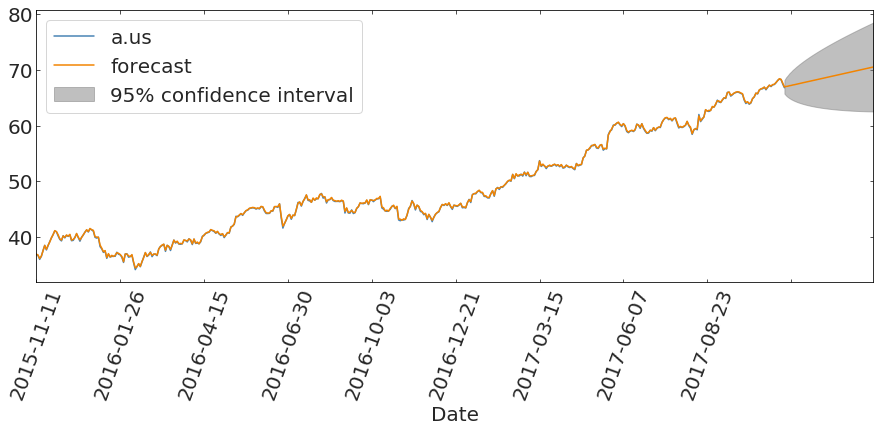

In [121]:
ax = tss[['a.us']].plot(figsize=(15,5))
min_mod.plot_predict(end=500, plot_insample=False, ax=ax);
ax.tick_params(which='major', axis='x', rotation = 70);
ax.legend(fontsize = 20);

<font color='red'>Interpretation:</font>

The 'a.us' closing price time series and the forcast of a autoregressive model with best fit parameters.

In [0]:
#choose the best ARIMA parameter for "aac.us"
#Choose 1 as integration order.
aics_st = np.zeros((5,5))
for p in range(5):
  for q in range(5):
    try:
      mod = sm.tsa.ARIMA(tss[['aac.us']], (p,1,q)).fit()
      aics_st[p][q] = mod.aic
    except:
      aics_st[p][q] = np.nan

In [124]:
min_parameters = np.where(aics_st == np.nanmin(aics_st))
min_p=min_parameters[0][0]
min_q=min_parameters[1][0]
print("best parameters for 'aac.us': p = {}, d = {}, q = {}. ".format(min_p, 1, min_q)) 

best parameters for 'aac.us': p = 4, d = 1, q = 3. 


In [126]:
min_mod = sm.tsa.ARIMA(tss[['aac.us']], (min_p,1,min_q)).fit()
min_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.aac.us   No. Observations:                  446
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -449.224
Method:                       css-mle   S.D. of innovations              0.659
Date:                Thu, 27 Feb 2020   AIC                            916.449
Time:                        03:51:25   BIC                            953.351
Sample:                             1   HQIC                           930.999
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0249      0.034     -0.724      0.469      -0.092       0.043
ar.L1.D.aac.us    -0.0233      0.112     -0.208      0.835      -0.243       0.196
ar.L2.D.aac.us    -0.2200      0.076     -2.878      0.004      -0.370      -0.070
ar.L3.D.aac.us    -0.8230      0.091     -9.065      0.000      -1.001      -0.645
ar.L4.D.aac.us     0.0798      0.049      1.627      0.104      -0.016       0.176
ma.L1.D.aac.us     0.0369      0.103      0.357      0.721      -0.165       0.239
ma.L2.D.aac.us     0.2980      0.085      3.492      0.001       0.131       0.465
ma.L3.D.aac.us     0.8565      0.103      8.278      0.000       0.654       1.059
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4180           -0.9446j            1.0329           -0.1837
AR.2            0.4180           +0.9446j            1.0329            0.1837
AR.3           -1.1095           -0.0000j            1.1095           -0.5000
AR.4           10.5806           -0.0000j           10.5806           -0.0000
MA.1            0.4098           -0.9122j            1.0000           -0.1828
MA.2            0.4098           +0.9122j            1.0000            0.1828
MA.3           -1.1675           -0.0000j            1.1675           -0.5000
-----------------------------------------------------------------------------
"""

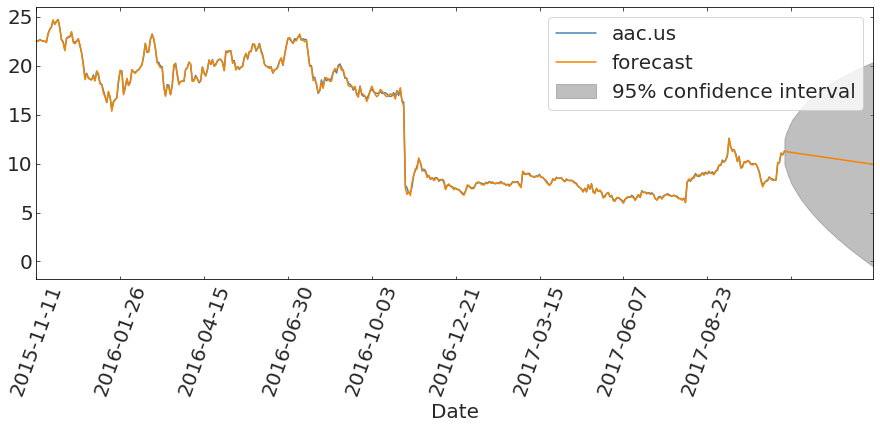

In [127]:
ax = tss[['aac.us']].plot(figsize=(15,5))
min_mod.plot_predict(end=500, plot_insample=False, ax=ax);
ax.tick_params(which='major', axis='x', rotation = 70);
ax.legend(fontsize = 20);

<font color='red'>Interpretation:</font>

The 'aac.us' closing price time series and the forcast of a autoregressive model with the best fit parameters.

# Redo the fit to one of the non-stsationary lightcurves with a different order of integration and compare the results. What do the coefficients tell you?

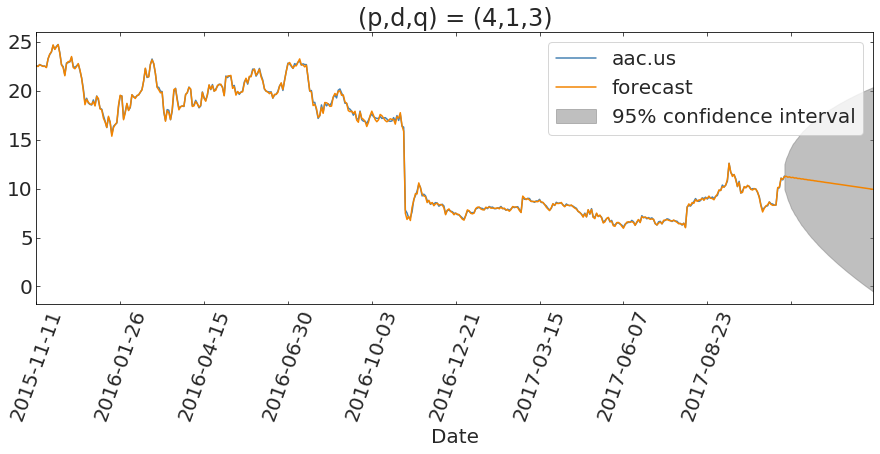

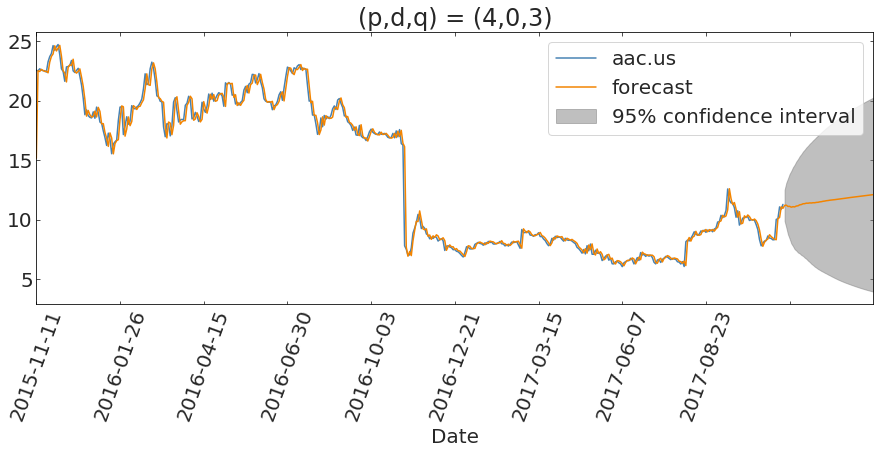

In [137]:
#Choose 'aac.us' time series.
ax = tss[['aac.us']].plot(figsize=(15,5));

#The the best parameters. (4,1,3)
min_mod = sm.tsa.ARIMA(tss[['aac.us']], (4,1,3)).fit()
min_mod.plot_predict(end=500, plot_insample=False, ax=ax);

ax.tick_params(which='major', axis='x', rotation = 70);
ax.legend(fontsize = 20);
ax.set_title('(p,d,q) = (4,1,3)')

#Try a different order of integration. (4,0,3)
ax = tss[['aac.us']].plot(figsize=(15,5));
sm.tsa.ARIMA(tss[['aac.us']], (4,0,3)).fit().plot_predict(end=500, plot_insample=False, ax=ax);
ax.set_title('(p,d,q) = (4,0,3)')

ax.tick_params(which='major', axis='x', rotation = 70);
ax.legend(fontsize = 20);

**Order of Integration l(d) is the degree of differencing. An l(0) process is a stationary process. The forcast of l(1) tends to be constant, l(2) shows a decreasing trend.**